# Q15

MLR with Interaction effect

Revise the Stock Price prediction model for utility companies, to include an interaction term between ROE and Annual dividend rate. 
Data File: MLR_Q15_StockPrices.csv
Location: https://drive.google.com/drive/folders/1ILKastUTJWccxaxIpJpjqCJDpsMJ-oC8

    1) Estimate the regression model coefficients
    2) Interpret each of the coefficients
    3) Does this new model fit the data better than was done in Problem 10.


In [1]:
import numpy as np
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv("MLR_Q10_StockPrice.csv")\
       .assign(Stock_Price = lambda df: df['Stock Price'].str.replace('$', '', regex=True).astype(int))\
       .drop('Stock Price', axis=1)
df['Interaction_ROE_Dividend'] = df['ROE'] * df['Dividend']

df.head(10)

,Electric Utility,ROE,Dividend,Stock_Price,Interaction_ROE_Dividend
0,1,13.7,2.36,23,32.332
1,2,12.8,3.12,34,39.936
2,3,6.9,2.48,20,17.112
3,4,12.7,2.36,24,29.972
4,5,15.3,1.92,20,29.376
5,6,13.3,1.60,13,21.280
6,7,14.6,3.08,33,44.968
7,8,15.8,1.52,15,24.016
8,9,12.0,2.72,26,32.640
9,10,15.3,2.56,25,39.168


In [7]:
import matplotlib.pyplot as plt

df[["Stock_Price", "ROE", "Dividend", "Interaction_ROE_Dividend"]].corr()

,Stock_Price,ROE,Dividend,Interaction_ROE_Dividend
Stock_Price,1.000000,0.178222,0.944691,0.841249
ROE,0.178222,1.000000,-0.012117,0.625211
Dividend,0.944691,-0.012117,1.000000,0.770031
Interaction_ROE_Dividend,0.841249,0.625211,0.770031,1.000000


In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_var = ["ROE", "Dividend", "Interaction_ROE_Dividend"]
X = df[x_var]
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], index=X.columns)

ROE                         25.534689
Dividend                    38.179012
Interaction_ROE_Dividend    60.698503
dtype: float64

In [3]:
def fit_lin_reg_with_intercept(X, Y):
    X = sm.add_constant(X) # adding a constan
    reg_model = sm.OLS(Y,X).fit()
    return reg_model

In [6]:
reg_model = fit_lin_reg_with_intercept(X=df[["ROE", "Dividend", "Interaction_ROE_Dividend"]], Y=df[["Stock_Price"]])
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:            Stock_Price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     60.85
Date:                Sat, 21 May 2022   Prob (F-statistic):           1.57e-07
Time:                        08:05:31   Log-Likelihood:                -28.107
No. Observations:                  16   AIC:                             64.21
Df Residuals:                      12   BIC:                             67.31
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

C:\Users\kumarmanglam.thakur\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


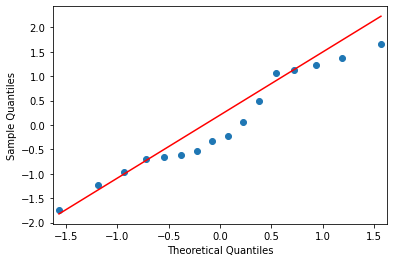

In [8]:
residuals = reg_model.resid 
sm.qqplot(residuals, fit=True, line="q")
plt.show()

### Answer
    1) 1) Estimate the regression model coefficients
    -44.6818 + 2.8796 * ROE + 25.0622 * Dividend - 0.9590 * Interaction_ROE_Dividend
    2) Interpret each of the coefficients
        There is high multicollinearity in data, hence p-values may not be correct. 
        The sign for the coefficient of interaction term is negative, even through its positively correalted with stock price
        The coefficient for ROE and Dividend, have increased. This could be to compensate for the negative sign of interaction term.
    3) Does this new model fit the data better than was done in Problem 10.
    Model R square has improved from 92.8% to 93.8%